In [37]:
import pandas as pd 
import string
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data = pd.read_table('SMSSpamCollection.tsv', names=['H or S', 'Text'])
data.head()

,H or S,Text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [39]:
# criando uma hipotese que os textos dos Spam  e mais longo
# vamos criar um modelo e ver o quando essa ideia é precisa e pode ajudar
# dentro do lambda usamos a contagem de espaços em brancos e subtraimos do total
data['body_len'] = data.Text.apply(lambda x : len(x) - x.count(' '))
data.head()

,H or S,Text,body_len
0,ham,I've been searching for the right words to tha...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",49
3,ham,Even my brother is not like to speak with me. ...,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28


In [40]:
# criando uma funcao para contar quantas pontuacoes tem nos testos
# dentro da list comprehension eu vou usar o 1 ao inves de uma varivale para que list comprehension 
# retorne 1 toda vez que achar uma pontuacao e depois eu somo tudo
# depois criamos uma formula para retornar a porcentagem como resultado final
def cont_punt(text):
    count = sum([1 for char in text if char in string.punctuation])
    por_count = round(count / (len(text) - text.count(' ')), 3) * 100
    return por_count


In [41]:
# criando uma nova coluna com o resultado da porcentagem
data['por_punc%'] = data.Text.apply(lambda x: cont_punt(x))
data.head()

,H or S,Text,body_len,por_punc%
0,ham,I've been searching for the right words to tha...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",49,4.1
3,ham,Even my brother is not like to speak with me. ...,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1


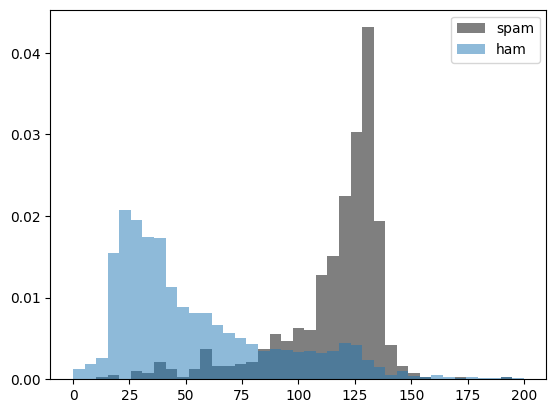

In [52]:
# agora vou plotar alguns histagrans
# aqui quando queremos filtar primeiro fazemos a comparacao
# depois dizemos onde o resultado da comparacao sera aplicado
# para o bins vou criar um array para ter um max e min e sua derivacao
# usamos o metodo density para normalizar os grafico e podermos comparar visualmente

bins = np.linspace(0,200,40)
plt.hist(data[data['H or S']=='spam']['body_len'], bins, alpha=0.5, label='spam',color='k', density=True)
plt.hist(data[data['H or S']=='ham']['body_len'], bins, alpha=0.5,  label='ham', density=True)
plt.legend()
plt.show()

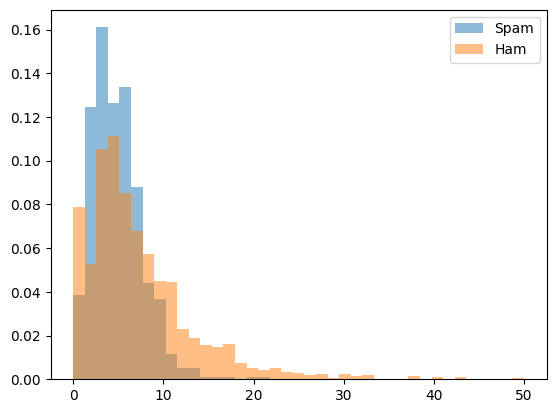

In [51]:
# criando histogram para ver a porcentagem de pontos entre Spam e Ham
bins = np.linspace(0,50,40)
plt.hist(data[data['H or S']=='spam']['por_punc%'],bins, alpha=0.5, label='Spam', density=True)
plt.hist(data[data['H or S']=='ham']['por_punc%'],bins,alpha=0.5,label='Ham', density=True)
plt.legend()
plt.show()

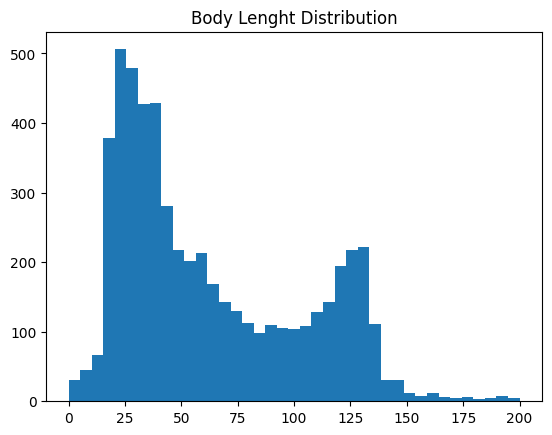

In [54]:
# vamos olhar a coluna inteira de valor das somas das palavras de cada msg
bins = np.linspace(0,200,40)
plt.hist(data['body_len'],bins)
plt.title('Body Lenght Distribution')
plt.show()


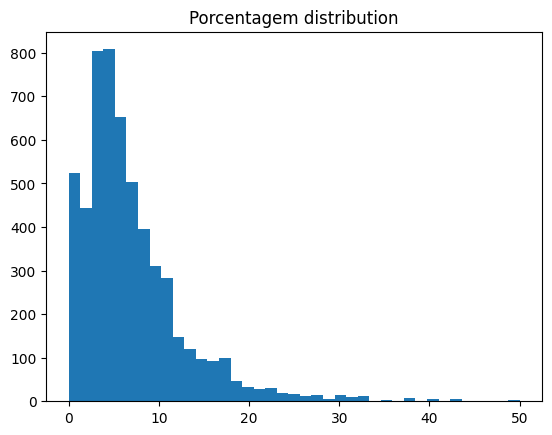

In [55]:
# vamos olhas separadamente a coluna das porcentagens das pontuacoes em cada msg
bins = np.linspace(0,50,40)
plt.hist(data['por_punc%'], bins)
plt.title('Porcentagem distribution')
plt.show()

### Box-Cox Power Transformations


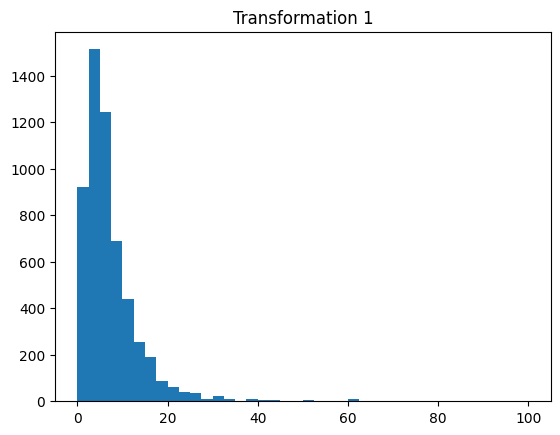

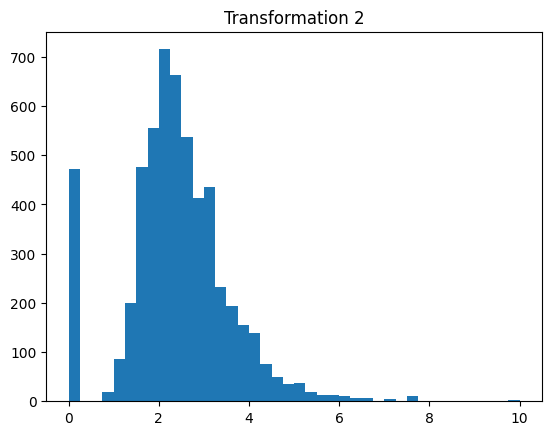

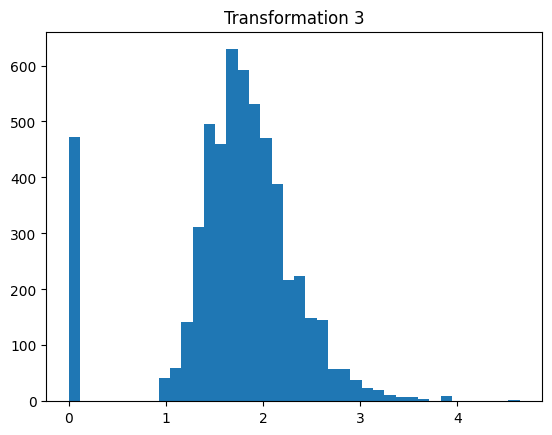

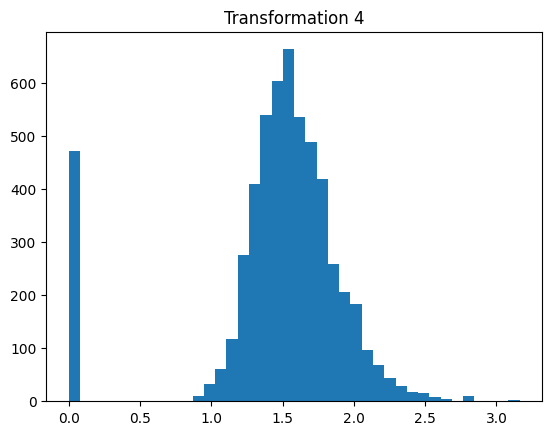

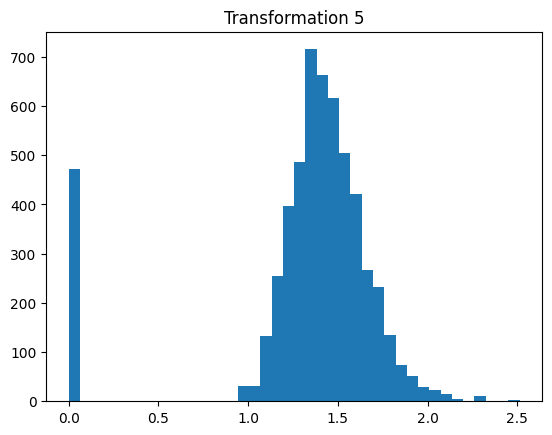

In [56]:
for i in range(1,6):
    plt.hist((data['por_punc%'])**(1/i), bins=40)
    plt.title(f'Transformation {i}')
    plt.show()